In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# in data processing, we assigned the RIC and eliminated unrelevant records
URL = (r'C:\Users\Shahabid\Desktop\NW IN Python Project\Inp Data - first outcome.xlsx')
inpatient = pd.read_excel(URL , parse_dates=['DC Date_YY-Q', 'DC Date_YY-Q','DC Date_YY-MM'] ) #index_col=0)

# Data Set Assessment

In [3]:
inpatient.head(3)

,Unnamed: 0,Entity Code & Name,Patient Account Number,Patient Med Rec No,Patient Class Desc,Admit Date,Discharge Date,LOS Acute,LOS ICU,Patient Age,...,ICD-10 DX Code 3presum,ICD-10 DX Code 4presum,ICD-10 DX Code 5presum,Any Presumptive Code,Presumptive,RIC_S2,Final_RIC_Desc,Final_RIC_Group,Counter,Count
0,0,Commnty,3003332958,10036869,Inpatient,2018-01-16,2018-01-19,3.0,NaN,51,...,NaN,NaN,NaN,0,NaN,NaN,No RIC Match,No RIC Match,0,1
1,1,Commnty,3003352814,10008423,Inpatient,2017-11-26,2018-01-03,38.0,NaN,57,...,NaN,NaN,NaN,0,NaN,20.0,Ric 20 Miscellaneous,Medically Complex,1,1
2,2,Commnty,3003362258,10088278,Inpatient,2017-12-04,2018-01-08,35.0,NaN,68,...,NaN,NaN,NaN,0,NaN,20.0,Ric 20 Miscellaneous,Medically Complex,2,1


In [4]:
inpatient = inpatient.drop(['Unnamed: 0','Patient Account Number','Patient Med Rec No', 'Prin Proc ICD-10-PCS CodePROC', 
                            'ICD-10-PCS Code-2PROC', 'ICD-10-PCS Code-3PROC', 'ICD-10-PCS Code-4PROC','Patient Class Desc',
                            'Financial Class Name', 'Primary Payor Plan Name', 'DRG Code', 'Discharge Status Code', 
                            'Final Destination Name', 'ICD-10-CM Prin Diag Code', 'ICD-10 DX Code 2', 'ICD-10 DX Code 3', 
                            'ICD-10 DX Code 4', 'ICD-10 DX Code 5', 'ICD-10 DX Code 6', 'ICD-10 DX Code 7', 'ICD-10 DX Code 8', 
                            'ICD-10 DX Code 9', 'ICD-10 DX Code 10', 'ICD-10 DX Code 11', 'ICD-10 DX Code 12', 
                            'Prin Proc ICD-10-PCS Code', 'ICD-10-PCS Code-2', 'ICD-10-PCS Code-3', 'ICD-10-PCS Code-4',
                            'ICD-10-PCS Code-5', 'ICD-10-PCS Code-6', 'ICD-10-PCS Code-7', 'ICD-10-PCS Code-8',
                            'ICD-10-PCS Code-9', 'ICD-10-PCS Code-10', 'ICD-10-PCS Code-11', 'ICD-10-PCS Code-12', 'PT Eval',
                            'OT Eval', 'SLP  Eval', 'First Therpy Date-PT', 'First Therpy Date-OT', 'First Therpy Date-SLP',
                            'ICD-10-PCS Code-5PROC', 'Age_85>', 'MO', 'Comorbid', '90', 'TF1', 'TF2', '91', 'TF3', 'TF4', 
                            'PROC', 'ICD-10-CM Prin Diag Code_RIC', 'ICD-10 DX Code 2_RIC', 'ICD-10 DX Code 3_RIC',
                            'ICD-10 DX Code 4_RIC','ICD-10 DX Code 5_RIC', 'RIC_99', 'RIC_S1a','ICD-10 DX Code 2presum',
                            'ICD-10 DX Code 3presum',  'ICD-10 DX Code 4presum', 'ICD-10 DX Code 5presum', 'Presumptive',
                            'ICD-10-CM Prin Diag Codev0','ICD-10 DX Code 2v0', 'ICD-10 DX Code 3v0', 'ICD-10 DX Code 4v0',
                            'ICD-10 DX Code 5v0', 'ICD-10 DX Code 6v0', 'ICD-10 DX Code 7v0', 'ICD-10 DX Code 8v0', 
                            'ICD-10 DX Code 9v0', 'ICD-10 DX Code 10v0', 'ICD-10 DX Code 11v0', 'ICD-10 DX Code 12v0'],
                           axis = 1)

In [5]:
inpatient.columns

Index(['Entity Code & Name', 'Admit Date', 'Discharge Date', 'LOS Acute',
       'LOS ICU', 'Patient Age', 'Patient Zip', 'DC Date_YY-Q',
       'DC Date_YY-MM', 'DC Date_YY', 'KHRS_LOS', 'Payor_Key_main',
       'KHRS_Payor', 'KHRS_Dc_Disp', 'MS-DRG Name', 'Product Line',
       'DRG_Weight', 'DRG_GMLOS', 'DRG_MDC', 'RIC_S1b', 'Any Presumptive Code',
       'RIC_S2', 'Final_RIC_Desc', 'Final_RIC_Group', 'Counter', 'Count'],
      dtype='object')

In [6]:
inpatient.shape

(57196, 26)

In [7]:
inpatient.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57196 entries, 0 to 57195
Data columns (total 26 columns):
Entity Code & Name      57196 non-null object
Admit Date              57196 non-null datetime64[ns]
Discharge Date          57196 non-null datetime64[ns]
LOS Acute               55372 non-null float64
LOS ICU                 8630 non-null float64
Patient Age             57196 non-null int64
Patient Zip             57182 non-null float64
DC Date_YY-Q            57196 non-null object
DC Date_YY-MM           57196 non-null datetime64[ns]
DC Date_YY              57196 non-null int64
KHRS_LOS                57196 non-null int64
Payor_Key_main          57196 non-null object
KHRS_Payor              57196 non-null object
KHRS_Dc_Disp            57196 non-null object
MS-DRG Name             57189 non-null object
Product Line            57189 non-null object
DRG_Weight              57189 non-null object
DRG_GMLOS               57181 non-null float64
DRG_MDC                 57189 non-null 

###### It seems we have pt with age 0 to 112 years old. We need to check it in more details and remove pt with age 0-17


In [8]:
inpatient['Patient Age'].min()

16

In [9]:
inpatient['KHRS_LOS'].value_counts().sort_index().head(10)

0    1148
1    7692
2    9365
3    9078
4    6975
5    5132
6    3877
7    2939
8    2281
9    1735
Name: KHRS_LOS, dtype: int64

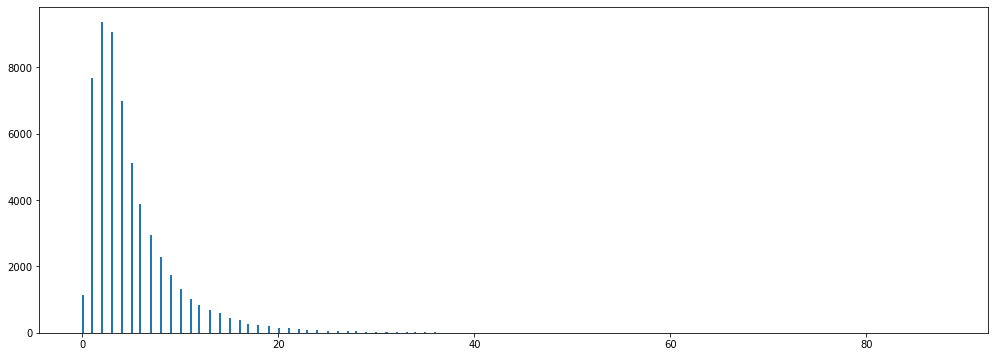

In [10]:
plt.figure(figsize=(17,6))
plt.hist(inpatient['KHRS_LOS'], bins = 'auto')
plt.show()

it seems we have some outliers in our LOS

In [11]:
# User Defined Function to remove outliers from 'KHRS_LOS' (as a numerical field)
def outlier(df, col):
    Q1 = df[col].quantile(0.0)
    Q3 = df[col].quantile(0.95)
    IQR = Q3 -Q1
    df = df.loc[-((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))),:]
    return df
for var in ['KHRS_LOS']:
    inpatient = outlier(inpatient, var)

In [12]:
inpatient['KHRS_LOS'].unique().max()

35

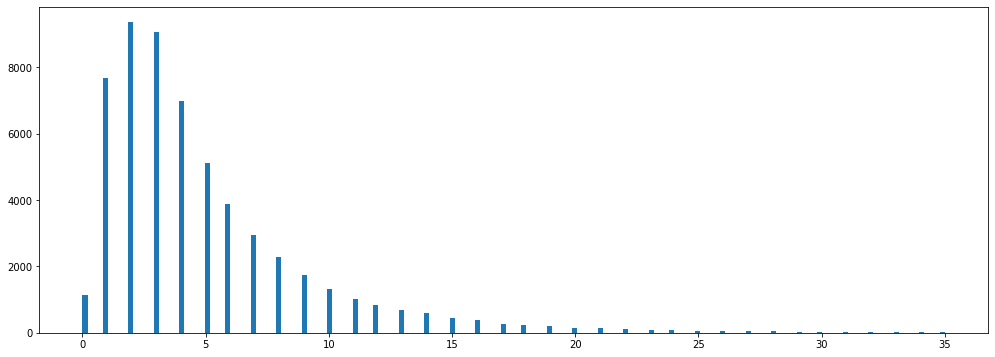

In [13]:

plt.figure(figsize=(17,6))
plt.hist(inpatient['KHRS_LOS'], bins = 'auto')
plt.show()

In [14]:
RICxDC = inpatient.loc[:, ['KHRS_Dc_Disp','KHRS_LOS']]

In [15]:
RICxDC_1 = pd.crosstab(RICxDC['KHRS_Dc_Disp'],RICxDC['KHRS_LOS'], margins=True, margins_name="Total")
RICxDC_1

KHRS_LOS,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,Total
KHRS_Dc_Disp,,,,,,,,,,,,,,,,,,,,,
HHA,70,635,1011,1069,1041,923,682,615,492,361,...,5,5,3,1,6,5,4,5,2,8313
Home,766,6073,7236,6173,4367,2806,1858,1201,831,606,...,4,5,4,0,3,1,2,0,3,33344
IRF,16,96,230,390,451,429,459,359,297,223,...,10,4,3,2,8,4,1,1,2,4063
LTACH,1,6,5,38,58,47,49,67,51,51,...,7,6,6,4,4,1,0,2,2,819
Other,260,705,563,492,380,337,263,223,188,180,...,10,10,9,3,1,4,4,5,2,4494
SNF,35,177,320,916,678,590,566,474,422,314,...,14,12,9,9,6,2,1,3,2,6085
Total,1148,7692,9365,9078,6975,5132,3877,2939,2281,1735,...,50,42,34,19,28,17,12,16,13,57118


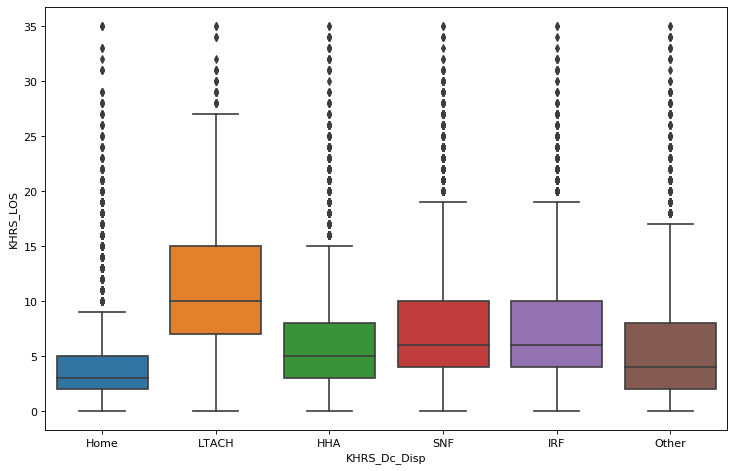

In [16]:
# RICxDC = RICxDC.drop(RICxDC.loc[data['Acute LOS']==7066,:].index , inplace=True)
plt.figure(figsize=(11,7), dpi=80)
sb.boxplot('KHRS_Dc_Disp','KHRS_LOS', data =RICxDC )

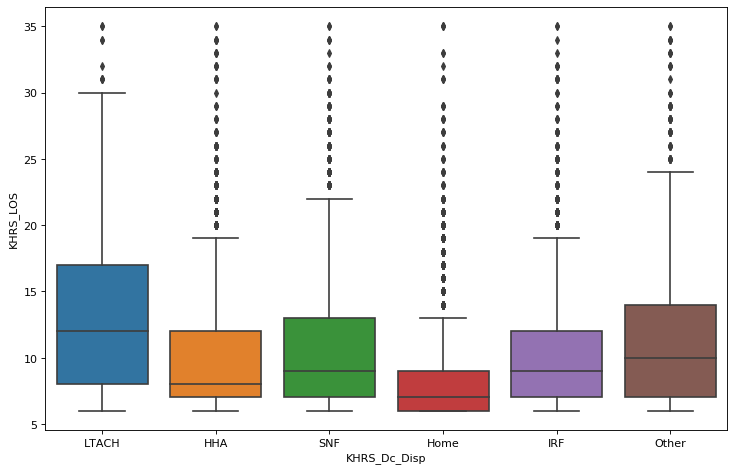

In [17]:
RICxDCxdays6 = inpatient.loc[inpatient['KHRS_LOS']>=6,:]
RICxDCxdays6_1 = RICxDCxdays6.loc[:, ['KHRS_Dc_Disp','KHRS_LOS']]

# RICxDC = RICxDC.drop(RICxDC.loc[data['Acute LOS']==7066,:].index , inplace=True)
plt.figure(figsize=(11,7), dpi=80)
sb.boxplot('KHRS_Dc_Disp','KHRS_LOS', data =RICxDCxdays6_1 )

In [18]:
# plt.figure(figsize=(11,9), dpi = 80)
# sb.boxplot('DCDate_YY-Q', 'Final_RIC_Group')

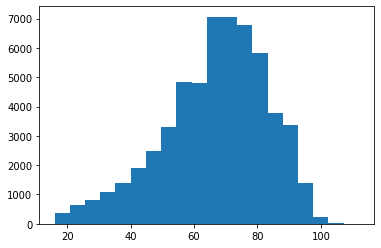

In [19]:
plt.hist(inpatient['Patient Age'],  bins=20)
plt.show()

In [20]:
PayorxDCxAllptxCounts = pd.pivot_table(inpatient, index=['KHRS_Payor'], columns= 'KHRS_Dc_Disp', values='KHRS_LOS', 
                                       aggfunc='count', fill_value='N/A', margins=True, dropna=True,   margins_name='Total' )
PayorxDCxAllptxCounts

KHRS_Dc_Disp,HHA,Home,IRF,LTACH,Other,SNF,Total
KHRS_Payor,,,,,,,
Charity,16.0,486.0,1,N/A,52.0,7,562
Comm,30.0,212.0,28,2,22.0,30,324
Comm Mc,876.0,8417.0,300,69,587.0,187,10436
Gov Other,19.0,187.0,6,2,43.0,N/A,257
MCD,582.0,4307.0,185,80,620.0,334,6108
MCR,4265.0,13345.0,3122,589,2143.0,3856,27320
MCR MC,2519.0,5994.0,421,77,961.0,1670,11642
SlfPay,6.0,396.0,N/A,N/A,66.0,1,469
Total,8313.0,33344.0,4063,819,4494.0,6085,57118


In [21]:
PayorxDCxAllptxALOS = pd.pivot_table(inpatient , index='KHRS_Payor', columns= 'KHRS_Dc_Disp', values='KHRS_LOS', aggfunc='mean',
    fill_value='N/A', margins=True, dropna=True,   margins_name='Total' ).round(decimals=1)
PayorxDCxAllptxALOS

KHRS_Dc_Disp,HHA,Home,IRF,LTACH,Other,SNF,Total
KHRS_Payor,,,,,,,
Charity,7.9,4.6,11,N/A,4.8,19,4.9
Comm,5.2,3.4,5.03571,22,5.4,6.5,4.3
Comm Mc,6.2,3.5,10.7133,13.2319,5.2,9.13904,4.2
Gov Other,8.4,3.8,11,14.5,3.6,N/A,4.3
MCD,7.0,4.3,9.38919,11.525,5.3,9.50599,5.2
MCR,5.4,3.4,6.89462,10.8014,5.8,6.28086,4.9
MCR MC,6.9,3.8,10.8314,14.8312,7.2,9.58743,5.9
SlfPay,10.0,2.7,N/A,N/A,2.1,6,2.7
Total,6.1,3.6,7.69235,11.4921,5.9,7.46886,5.0


In [22]:
PayorxDCxptdayd6 = inpatient.loc[inpatient['KHRS_LOS']>=6,:]
PayorxDCxptdayd6xCounts = pd.pivot_table(PayorxDCxptdayd6, index=['KHRS_Payor'], columns= 'KHRS_Dc_Disp', values='KHRS_LOS',
                         aggfunc='count', fill_value='N/A', margins=True, dropna=True,   margins_name='Total' )
PayorxDCxptdayd6xCounts

KHRS_Dc_Disp,HHA,Home,IRF,LTACH,Other,SNF,Total
KHRS_Payor,,,,,,,
Charity,7.0,133.0,1,N/A,16.0,7,164
Comm,11.0,31.0,10,2,7.0,12,73
Comm Mc,367.0,1301.0,248,58,197.0,127,2298
Gov Other,10.0,28.0,5,2,9.0,N/A,54
MCD,316.0,1033.0,151,73,198.0,232,2003
MCR,1582.0,2159.0,1682,458,856.0,1767,8504
MCR MC,1267.0,1204.0,354,71,467.0,1223,4586
SlfPay,4.0,34.0,N/A,N/A,7.0,1,46
Total,3564.0,5923.0,2451,664,1757.0,3369,17728


In [23]:
PayorxDCxptdayd6xALOS = pd.pivot_table(PayorxDCxptdayd6.round({'KHRS_LOS':1}), index=['KHRS_Payor'], columns= 'KHRS_Dc_Disp', 
                                       values=['KHRS_LOS'], aggfunc='mean', fill_value='N/A', margins=True, dropna=True,
                                       margins_name='Total' ).round(decimals=1)
PayorxDCxptdayd6xALOS

KHRS_LOS                                             
KHRS_Dc_Disp      HHA  Home      IRF    LTACH Other      SNF Total
KHRS_Payor                                                        
Charity          13.7   9.4       11      N/A  10.7       19  10.1
Comm              8.9   8.2      8.3       22  12.0  10.6667   9.5
Comm Mc          10.7   8.4  12.1573  14.9828  11.5  11.7087   9.8
Gov Other        12.8   9.8     12.2     14.5   9.3      N/A  10.7
MCD              10.0   8.7  10.6556  12.2466  11.4   12.194   9.9
MCR               9.4   8.3  9.79786  12.7904  10.9  9.71986   9.6
MCR MC           10.5   8.8  12.2034  15.7887  12.3  11.8258  10.8
SlfPay           12.5  10.3      N/A      N/A   6.7        6   9.8
Total            10.0   8.5  10.4361  13.2756  11.4  10.7513  10.0

In [24]:
pd.pivot_table(inpatient,index=['Entity Code & Name','KHRS_Payor'],values=["Count",'KHRS_LOS'],
               columns=['KHRS_Dc_Disp'],aggfunc={"Count":[np.sum],'KHRS_LOS': 'mean'}, fill_value=0)

Count                                 KHRS_LOS  \
                                sum                                     mean   
KHRS_Dc_Disp                    HHA  Home   IRF LTACH Other   SNF        HHA   
Entity Code & Name KHRS_Payor                                                  
Commnty            Charity        5   191     0     0    19     5   6.800000   
                   Comm          22   128    22     2    15    22   4.227273   
                   Comm Mc      582  5073   189    33   349    97   5.987973   
                   Gov Other      9    90     4     1    23     0  10.444444   
                   MCD          221  1807    72    22   241   103   7.841629   
                   MCR         2506  7389  2135   211  1217  2082   5.468077   
                   MCR MC      1333  3050   255    32   494   831   7.073518   
                   SlfPay         4   165     0     0    27     1  11.250000   
St Cath            Charity        4   183     0     0    20     1   7.000000   
                   Comm           1    32     3     0     4     1   5.000000   
                   Comm Mc       43   596    38    10    49    17   6.209302   
                   Gov Other      4    19     1     0     7     0   8.000000   
                   MCD          215  1195    81    40   225   122   5.888372   
                   MCR          522  1401   421   184   260   452   4.741379   
                   MCR MC       391   802    71    24   149   201   6.375959   
                   SlfPay         0   140     0     0    27     0   0.000000   
St Mary            Charity        7   112     1     0    13     1   9.285714   
                   Comm           7    52     3     0     3     7   8.142857   
                   Comm Mc      251  2748    73    26   189    73   6.633466   
                   Gov Other      6    78     1     1    13     0   5.666667   
                   MCD          146  1305    32    18   154   109   7.438356   
                   MCR         1237  4555   566   194   666  1322   5.523040   
                   MCR MC       795  2142    95    21   318   638   6.800000   
                   SlfPay         2    91     0     0    12     0   7.500000   

                                                                         \
                                                                          
KHRS_Dc_Disp                       Home        IRF      LTACH     Other   
Entity Code & Name KHRS_Payor                                             
Commnty            Charity     5.329843   0.000000   0.000000  7.105263   
                   Comm        3.484375   5.090909  22.000000  6.266667   
                   Comm Mc     3.608910  11.222222  15.727273  5.352436   
                   Gov Other   3.477778  13.750000  14.000000  3.608696   
                   MCD         4.385722  10.805556  11.863636  5.253112   
                   MCR         3.417242   7.140984  12.962085  6.377157   
                   MCR MC      3.854754  11.560784  14.750000  7.718623   
                   SlfPay      3.060606   0.000000   0.000000  2.296296   
St Cath            Charity     3.721311   0.000000   0.000000  3.500000   
                   Comm        3.312500   5.666667   0.000000  5.000000   
                   Comm Mc     3.489933   9.052632   7.500000  4.795918   
                   Gov Other   4.210526   5.000000   0.000000  4.142857   
                   MCD         4.304603   8.543210  10.350000  5.568889   
                   MCR         3.134904   5.546318   8.135870  4.096154   
                   MCR MC      3.442643   9.830986  14.041667  5.671141   
                   SlfPay      1.942857   0.000000   0.000000  2.444444   
St Mary            Charity     4.723214  11.000000   0.000000  3.461538   
                   Comm        3.326923   4.000000   0.000000  1.333333   
                   Comm Mc     3.226710  10.260274  12.269231  5.126984   
                   Gov Other   3.974359   6.000000  15.000000  3

# ECDF Graph

In [25]:
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)



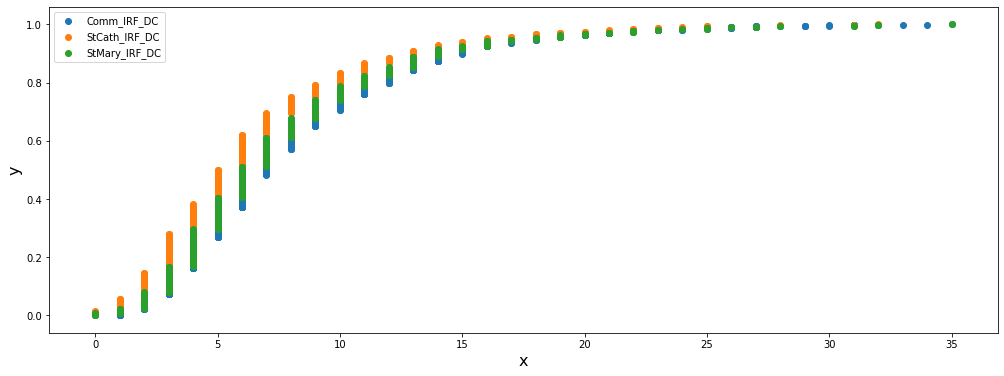

In [26]:
plt.figure(figsize=(17,6))

Comm_IRF_DC = inpatient.loc[((inpatient['Entity Code & Name']=='Commnty') & (inpatient['KHRS_Dc_Disp'] =='IRF')),:]
Comm_IRF_DC = Comm_IRF_DC['KHRS_LOS']
x,y = ecdf(Comm_IRF_DC)
plt.scatter(x=x, y=y);


StCath_IRF_DC = inpatient.loc[((inpatient['Entity Code & Name']=='St Cath') & (inpatient['KHRS_Dc_Disp'] =='IRF')),:]
StCath_IRF_DC = StCath_IRF_DC['KHRS_LOS']
x,y = ecdf(StCath_IRF_DC)
plt.scatter(x=x, y=y);

StMary_IRF_DC = inpatient.loc[((inpatient['Entity Code & Name']=='St Mary') & (inpatient['KHRS_Dc_Disp'] =='IRF')),:]
StMary_IRF_DC = StMary_IRF_DC['KHRS_LOS']
x,y = ecdf(StMary_IRF_DC)
plt.scatter(x=x, y=y);

plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)

plt.legend(["Comm_IRF_DC", "StCath_IRF_DC", "StMary_IRF_DC"])

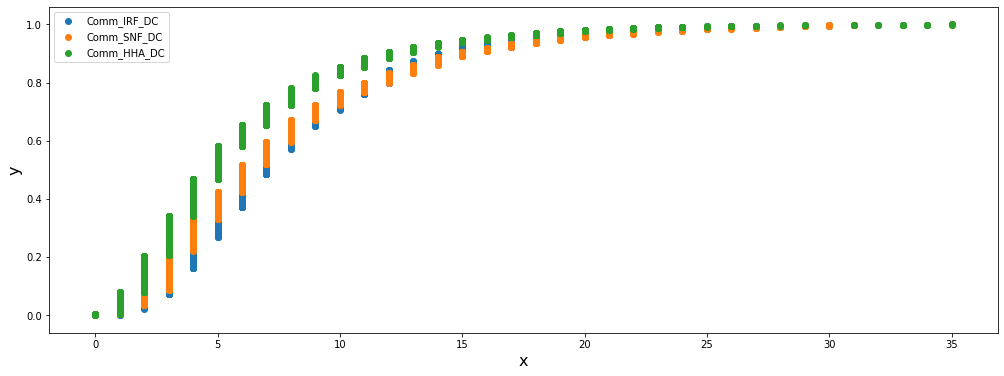

In [27]:
plt.figure(figsize=(17,6))

Comm_IRF_DC = inpatient.loc[((inpatient['Entity Code & Name']=='Commnty') & (inpatient['KHRS_Dc_Disp'] =='IRF')),:]
Comm_IRF_DC = Comm_IRF_DC['KHRS_LOS']
x,y = ecdf(Comm_IRF_DC)
plt.scatter(x=x, y=y);

Comm_SNF_DC = inpatient.loc[((inpatient['Entity Code & Name']=='Commnty') & (inpatient['KHRS_Dc_Disp'] =='SNF')),:]
Comm_SNF_DC = Comm_SNF_DC['KHRS_LOS']
x,y = ecdf(Comm_SNF_DC)
plt.scatter(x=x, y=y);


Comm_HHA_DC = inpatient.loc[((inpatient['Entity Code & Name']=='Commnty') & (inpatient['KHRS_Dc_Disp'] =='HHA')),:]
Comm_HHA_DC = Comm_HHA_DC['KHRS_LOS']
x,y = ecdf(Comm_HHA_DC)
plt.scatter(x=x, y=y);



plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)

plt.legend(["Comm_IRF_DC", 'Comm_SNF_DC', "Comm_HHA_DC"])

In [28]:
AA = pd.pivot_table(inpatient, values = 'KHRS_LOS',index = ['Entity Code & Name','KHRS_Dc_Disp'],columns='DC Date_YY-Q', aggfunc="count").stack()
AA 

Entity Code & Name  KHRS_Dc_Disp  DC Date_YY-Q
Commnty             HHA           2018 Q1         622
                                  2018 Q2         511
                                  2018 Q3         508
                                  2018 Q4         553
                                  2019 Q1         600
                                                 ... 
St Mary             SNF           2018 Q4         239
                                  2019 Q1         277
                                  2019 Q2         282
                                  2019 Q3         294
                                  2019 Q4         252
Length: 144, dtype: int64

In [29]:
def DcxDisp_plot(facility, DC):
    data = AA.loc[facility, DC]
    plt.plot(data.index, data.values)

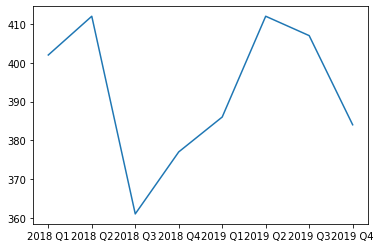

In [30]:
DcxDisp_plot('Commnty', 'SNF')

In [31]:
plt.figure(figsize=(18,8))

DCs = ['HHA','SNF','IRF']
for dc in DCs:
    DcxDisp_plot('Comnty', dc)
plt.grid()
plt.legend(dc, )
plt.show()

KeyError: ('Comnty', 'HHA')

<Figure size 1296x576 with 0 Axes>

In [ ]:
inpatient.groupby(by=["Final_RIC_Group"])['DC Date_YY-MM'].value_counts().unstack().sort_values(["Final_RIC_Group"],ascending=False)

In [ ]:
RICGroupXdcXtrend = inpatient.pivot_table(index = "Final_RIC_Group", 
                                columns = 'DC Date_YY-MM', values = 'KHRS_LOS', aggfunc='mean', margins=True)
RICGroupXdcXtrend.sort_index(axis = 1 ,level=0, ascending = True)


# RICGroupXdcXtrend = RICGroupXdcXtrend.reindex(RICGroupXdcXtrend['Discharge Date_YY-MM'].sort_values(by='Discharge Date_YY-MM', ascending=False).index)

In [ ]:
RICGroupXdcXtrend = RICGroupXdcXtrend[['2018 1','2018 2', '2018 3', '2018 4', '2018 5', '2018 6', '2018 7', '2018 8', 
                                       '2018 9', '2018 10', '2018 11', '2018 12',  '2019 1', '2019 2', '2019 3', '2019 4', 
                                       '2019 5', '2019 6', '2019 7', '2019 8', '2019 9', '2019 10', '2019 11', '2019 12', 'All']]
RICGroupXdcXtrend

In [ ]:
RICGroupXdcXtrend.plot()

In [ ]:
inpatient["KHRS_Dc_Disp"].value_counts()

In [ ]:
plt.figure(figsize = (18,7), dpi = 800)
HHA = inpatient.loc[inpatient["KHRS_Dc_Disp"]=="HHA",:]
HHA = HHA.groupby(by=['DC Date_YY-Q'])['KHRS_LOS'].mean()
HHA.plot()

SNF = inpatient.loc[inpatient["KHRS_Dc_Disp"]=="SNF",:]
SNF = SNF.groupby(by=['DC Date_YY-Q'])['KHRS_LOS'].mean()
SNF.plot()


IRF = inpatient.loc[inpatient["KHRS_Dc_Disp"]=="IRF",:]
IRF = IRF.groupby(by=['DC Date_YY-Q'])['KHRS_LOS'].mean()
IRF.plot()

plt.legend()
HHA = inpatient.loc[inpatient["KHRS_Dc_Disp"]=="HHA",:]# legend((line1, line2, line3), ('label1', 'label2', 'label3'))

In [ ]:
HHA = data.loc[data["KHRS_Dc_Disp"]=="HHA",:]
y = HHA['Discharge Date_YY-Q'].to_numpy()
x = HHA['KHRS_LOS'].to_numpy()
plt.plot(x,y,'r--')

In [ ]:
my_array = np.array([[1,5,9,13],[2,6,10,14],[3,7,11,15],[4,8,12,16]])
my_df = pd.DataFrame(my_array, index=["a",'b','c','d'], columns=['col1','col2','col3','col1'])
my_df

In [ ]:
my_dict = {'col1':[1,2,3,4],'col2':[5,6,7,8],'col3':[9,10,11,12],'col4':[13,14,15,16]}
my_df_dict = pd.DataFrame(my_dict, index=["a",'b','c','d'], columns=['col1','col2','col3','col1'])
my_df_dict

# Decisin Tree

In [ ]:
inpatforDT = inpatient.loc[:,['LOS ICU', 'Patient Age', 'DRG Code', 'Discharge Status Code',
                'ICD-10-CM Prin Diag Code','ICD-10 DX Code 2', 'ICD-10 DX Code 3', 'ICD-10 DX Code 4','ICD-10 DX Code 5', 'ICD-10 DX Code 6', 'ICD-10 DX Code 7',
       'ICD-10 DX Code 8', 'ICD-10 DX Code 9', 'ICD-10 DX Code 10', 'ICD-10 DX Code 11', 'ICD-10 DX Code 12', 'Prin Proc ICD-10-PCS Code',
       'ICD-10-PCS Code-2', 'ICD-10-PCS Code-3', 'ICD-10-PCS Code-4', 'ICD-10-PCS Code-5', 'ICD-10-PCS Code-6', 'ICD-10-PCS Code-7',
       'ICD-10-PCS Code-8', 'ICD-10-PCS Code-9', 'ICD-10-PCS Code-10', 'ICD-10-PCS Code-11', 'ICD-10-PCS Code-12', 'PT Eval', 'OT Eval',
       'SLP  Eval','KHRS_LOS', 'Payor_Key_main', 'KHRS_Payor', 'KHRS_Dc_Disp', 'DRG_Weight' ]]

In [ ]:
inpatforDT['KHRS_Dc_Disp'].unique()

In [ ]:
def losICU(x):
    if x==0:
        x = 0
    if x >= 1:
        x = 1


inpatforDT['ICU'] = inpatforDT['LOS ICU'].apply(dcdispcode)
inpatforDT.drop('LOS ICU', axis = 1)

def dcdispcode(x):
    if x=='Home':
        x = 1
    if x == 'LTACH':
        x = 2
    if x == 'HHA':
        x = 3
    if x == 'SNF':
        x = 4
    if x == 'IRF':
        x = 5
    if x == 'Other':
        x = 6

inpatforDT['DC_Code'] = inpatforDT['KHRS_Dc_Disp'].apply(dcdispcode)
inpatforDT.drop('KHRS_Dc_Disp', axis = 1)

In [ ]:
inpatforDT = inpatforDT.head(5000)
inpatforDT.shape

In [ ]:
inpatforDT = pd.get_dummies(inpatient_test, columns = [])

In [ ]:
inpatforDT.loc[:,]

In [ ]:
x = iris.data
y = iris.target